In [10]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('combined_data_1.txt.zip',header = None,names=['Cust_Id','Rating'],usecols=[0,1])

In [5]:
data

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [6]:
#calculate how many unique customers
movie_count = data.isnull().sum()["Rating"]
cust_count=data["Cust_Id"].nunique()
cust_count=cust_count-movie_count

In [7]:
cust_count

470758

In [8]:
#total number of ratings given by the customer
rating_count = data["Cust_Id"].count()-movie_count
rating_count

24053764

In [9]:
# how many people have rated the movies as 1,2,3,4,5 stars rating to the movies
stars = data.groupby('Rating')['Rating'].agg('count')
stars

Rating
1.0    1118186
2.0    2439073
3.0    6904181
4.0    8085741
5.0    5506583
Name: Rating, dtype: int64

## To plot the distribution of the ratings in as a bar plot

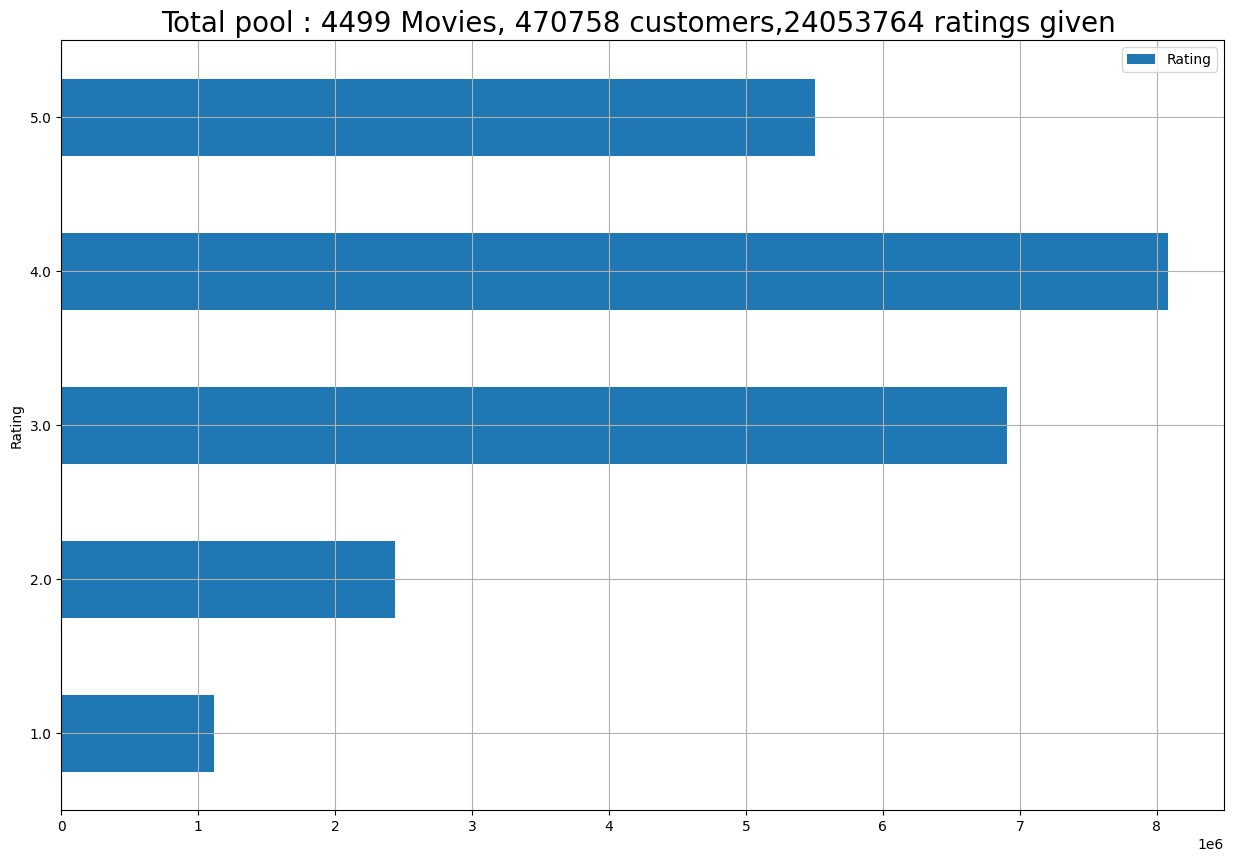

In [11]:
ax = stars.plot(kind='barh',legend='False',figsize=(15,10))
plt.title(f"Total pool : {movie_count} Movies, {cust_count} customers,{rating_count} ratings given ",fontsize=20)
plt.grid(True)

In [12]:
# add another column we will have null values
df_nan = pd.DataFrame(pd.isnull(data["Rating"]))
df_nan=df_nan[df_nan["Rating"]==True]

In [13]:
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [14]:
df_nan=df_nan.reset_index()
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [15]:
movie_np=[]
movie_id=1
for i,j in zip(df_nan["index"][1:],df_nan["index"][:-1]):
    temp=np.full(i-j-1,movie_id)
    movie_np=np.append(movie_np,temp)
    movie_id+=1
last_record =np.full(len(data)-df_nan.iloc[-1,0]-1,movie_id)


In [16]:
movie_np=np.append(movie_np,last_record)

In [17]:
data=data[pd.notnull(data["Rating"])]

In [18]:
data['Movie_Id']=movie_np.astype('int')

C:\Users\raghu\AppData\Local\Temp\ipykernel_9300\3189015656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Movie_Id']=movie_np.astype('int')


In [19]:
data["Cust_Id"]=data["Cust_Id"].astype('int')

C:\Users\raghu\AppData\Local\Temp\ipykernel_9300\432399076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Cust_Id"]=data["Cust_Id"].astype('int')


In [20]:
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in number
f=['count','mean']

In [21]:
data_movie_summary=data.groupby('Movie_Id')['Rating'].agg(f)
data_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [22]:
# now we will create the benchmark
movie_benchmark = round(data_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [23]:
drop_movie_list=data_movie_summary[data_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int32', name='Movie_Id', length=3149)

In [24]:
# now we will remove all the users who are in activee
data_cust_summary = data.groupby('Cust_Id')['Rating'].agg(f)
data_cust_summary

,count,mean
Cust_Id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [25]:
cust_benchmark=round(data_cust_summary['count'].quantile(0.7))
cust_benchmark

52

In [26]:
drop_cust_list=data_cust_summary[data_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int32', name='Cust_Id', length=327300)

In [27]:
data = data[~data['Movie_Id'].isin(drop_movie_list)]
data=data[~data['Cust_Id'].isin(drop_cust_list)]
print('After trimming the shape of the data is',data.shape)

After trimming the shape of the data is (17337458, 3)


In [28]:
df_title = pd.read_csv("C:/Users/raghu/Downloads/movie_titles.csv", encoding = "ISO-8859-1", header = None,usecols=[0,1,2] ,names = ['Movie_Id', 'Year', 'Name'])

In [29]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [30]:
df_title.set_index('Movie_Id',inplace=True)

In [31]:
df_title.head()

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [32]:
# Import required libraries
import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [34]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(data[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0037  0.9920  0.9975  0.9977  0.0048  
MAE (testset)     0.8083  0.7966  0.8039  0.8029  0.0048  
Fit time          3.79    3.64    3.71    3.72    0.06    
Test time         0.17    0.25    0.17    0.20    0.04    


{'test_rmse': array([1.0036749 , 0.99200842, 0.99751972]),
 'test_mae': array([0.80832566, 0.79661763, 0.80385189]),
 'fit_time': (3.7909035682678223, 3.641662836074829, 3.714344024658203),
 'test_time': (0.1735367774963379, 0.24933338165283203, 0.17453360557556152)}

## To find all the movies rated as 5 stars by user with userId = 712664

In [36]:
dataset_712664 = data[(data['Cust_Id'] == 712664) & (data['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

Movie_Id
3                              Character
79                           The Killing
175                       Reservoir Dogs
199                      The Deer Hunter
241                   North by Northwest
256    Ghost Dog: The Way of the Samurai
348        The Last Temptation of Christ
357                House of Sand and Fog
416                             Elephant
442                  Mississippi Burning
Name: Name, dtype: object

# Train an SVD to predict ratings for user with userId = 712664

In [37]:
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often 
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
data = Dataset.load_from_df(data[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))

        Year                                            Name  Estimate_Score
4352  2002.0                  Curb Your Enthusiasm: Season 3        5.000000
2018  2004.0                                Samurai Champloo        5.000000
721   2003.0                              The Wire: Season 1        5.000000
241   1995.0  Neon Genesis Evangelion: The End of Evangelion        5.000000
871   1954.0                                   Seven Samurai        5.000000
174   1992.0                                  Reservoir Dogs        5.000000
2101  1994.0                          The Simpsons: Season 6        4.994354
4114  1999.0                         The Simpsons: Bart Wars        4.972430
2429  1979.0                      Alien: Collector's Edition        4.970744
404   1987.0                                 Wings of Desire        4.952919
